In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [90]:
## Read the dataset
df = pd.read_csv('dataset/train.csv')
df.head()

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,01/01/2002 00,1,Studio,15.31,46.61,1.06,0.97,Low,0,Swimming Pool,0.0,64.85
1,01/01/2002 08,4,NaN,21.01,66.11,2.98,0.91,Upper Middle,1,Swimming Pool,1.0,192.50
2,01/01/2002 16,2,Cottage,12.86,60.86,1.44,1.43,Middle,0,NaN,1.0,116.62
3,02/01/2002 00,2,1BHK,20.16,50.58,1.48,0.91,Middle,-1,Garden,0.0,76.96
4,02/01/2002 08,2,Cottage,16.23,52.25,1.14,1.11,Middle,0,Fountain,0.0,104.70


In [91]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format = "%d/%m/%Y %H")

# Extract useful features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Hour"] = df["Timestamp"].dt.hour
df['Week'] = df['Timestamp'].dt.weekday

df

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week
0,2002-01-01 00:00:00,1,Studio,15.31,46.61,1.06,0.970000,Low,0,Swimming Pool,0.0,64.85,2002,1,1,0,1
1,2002-01-01 08:00:00,4,NaN,21.01,66.11,2.98,0.910000,Upper Middle,1,Swimming Pool,1.0,192.50,2002,1,1,8,1
2,2002-01-01 16:00:00,2,Cottage,12.86,60.86,1.44,1.430000,Middle,0,NaN,1.0,116.62,2002,1,1,16,1
3,2002-01-02 00:00:00,2,1BHK,20.16,50.58,1.48,0.910000,Middle,-1,Garden,0.0,76.96,2002,1,2,0,2
4,2002-01-02 08:00:00,2,Cottage,16.23,52.25,1.14,1.110000,Middle,0,Fountain,0.0,104.70,2002,1,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2014-10-10 00:00:00,2,1BHK,25.61,61.5,1.70,0.940000,Low,0,NaN,0.0,78.59,2014,10,10,0,4
13996,2014-10-10 08:00:00,5,2BHK,13.27,52.58,1.88,1.030000,Upper Middle,0,Garden,1.0,185.50,2014,10,10,8,4
13997,2014-10-10 16:00:00,4,2BHK,NaN,46.93,1.22,1.100000,Middle,0,NaN,1.0,180.28,2014,10,10,16,4
13998,2014-10-11 00:00:00,4,3BHK,11.62,64.48,2.86,1.120000,Upper Middle,1,Swimming Pool,0.0,212.19,2014,10,11,0,5


In [93]:
## Checking for null values
df.isnull().sum()

Timestamp                      0
Residents                      0
Apartment_Type               426
Temperature                  441
Humidity                       0
Water_Price                    0
Period_Consumption_Index       0
Income_Level                 426
Guests                         0
Amenities                   5997
Appliance_Usage              415
Water_Consumption              0
Year                           0
Month                          0
Day                            0
Hour                           0
Week                           0
dtype: int64

In [94]:
## Data types of features

df.dtypes

Timestamp                   datetime64[ns]
Residents                            int64
Apartment_Type                      object
Temperature                        float64
Humidity                            object
Water_Price                        float64
Period_Consumption_Index           float64
Income_Level                        object
Guests                               int64
Amenities                           object
Appliance_Usage                    float64
Water_Consumption                  float64
Year                                 int32
Month                                int32
Day                                  int32
Hour                                 int32
Week                                 int32
dtype: object

In [95]:
## Retrieving categorical and numerical and columns.

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
num_cols = [col for col in df.columns if col not in cat_cols]

print("Numerical Columns:",num_cols)
print("---------------------------------------")
print("Cateogical Columns:",cat_cols)

Numerical Columns: ['Timestamp', 'Residents', 'Temperature', 'Water_Price', 'Period_Consumption_Index', 'Guests', 'Appliance_Usage', 'Water_Consumption', 'Year', 'Month', 'Day', 'Hour', 'Week']
---------------------------------------
Cateogical Columns: ['Apartment_Type', 'Humidity', 'Income_Level', 'Amenities']


In [96]:
## Classes in categorical columns
for col in cat_cols:
    print(df[col].value_counts())
    print("--------------------------")

Apartment_Type
2BHK        3157
1BHK        3019
Bungalow    1925
3BHK        1909
Cottage     1824
Studio      1186
Detached     554
Name: count, dtype: int64
--------------------------
Humidity
51.69    13
53.07    12
49.32    12
48.85    11
56.28    11
         ..
40.6      1
75.89     1
30.3      1
64.67     1
64.48     1
Name: count, Length: 4515, dtype: int64
--------------------------
Income_Level
Middle          5323
Upper Middle    3966
Low             2276
Rich            1593
z3>8{              1
                ... 
|8*CE              1
a(rZg              1
=7|+4              1
j~+x!              1
c&8%1              1
Name: count, Length: 420, dtype: int64
--------------------------
Amenities
Garden           2627
Swimming Pool    2086
Fountain         1648
Jacuzzi          1642
Name: count, dtype: int64
--------------------------


In [97]:
## Datatype of humidity should be cahnged to float
df['Humidity'] = pd.to_numeric(df['Humidity'], errors= 'coerce')

In [98]:
## Income-Level has inconsistent entries

print(df['Income_Level'].unique())
print("Number of Unique values", len(df['Income_Level'].unique()))

['Low' 'Upper Middle' 'Middle' 'yePea' 'Rich' nan ']b0./' 'yYuZN' '_"J7?'
 '6@}4l' 'o0&[1' 'bkE27' '{]ji&' 'q{Tz7' 'X2FI-' 'Q@-3X' '!4Wx{' 'qZrsg'
 'v`o/f' 'g:%Wi' ':5;m/' ';bdFQ' ']C|}k' '8!zeE' '7+nw.' 'Sy"f_' 'yu]">'
 'J8Pdc' '$_W6%' 'O@|<e' '{Z.we' '66|Sd' 'mk8z:' '@?6Du' '\\E>Y(' '(GdBb'
 ",`#'/" 'mki)|' 'ZTqLe' 'D\\Yx/' 'mMRFh' 'Gy\\+z' 'c({~F' '[pwI2' 'gg%S>'
 'FWZ\\,' '({9!q' 'AykF{' '\\SO\\r' '?6[TF' 'z&BPb' 'od0#.' '&cX>I'
 '<~|.?' 'C>#Zr' ")'uvQ" '8TVie' '"(9X#' '4KTM4' 'OM4jJ' '4)_q3' 'z1J/}'
 'o;^g`' 'oi$`o' '|kz)\\' "~'XT-" 'C_WQY' 'r>%r?' '#VQ<)' '}zP9%' '+[zOz'
 '%E|0!' 'g%M%z' 'd;oiZ' 'M{Cql' 'C[E:E' 'vPjT?' '#>C3*' '?8X~i' 'JFV]N'
 'a^fUS' 'eE9!)' 'fP;,!' '=]V8?' "D'Ev0" '3:K1r' 'e|8Y_' 'ejK#;' '$rVp@'
 '7\\3XL' 'bLGA{' 'YA&7V' 'WK}3_' 'zjhwd' 'dSH8!' '?MXM[' '+wKIN' 'rnW}7'
 'B@`\\^' '~lWKR' '<A=1L' 'uAwbA' "^J,'a" 'yJ?Hs' 'spbS0' 'Y%sM^' 'U1OAu'
 '~&Wo!' 'W|ZI:' 'q.4ZK' 'rMp\\g' 'U9p&\\' 'Rs/9[' 'Xz-5g' 'hC09X' '];3qm'
 '&SL#G' '^Y!f$' '?eBvy' 'E.58]' 'p)*x?' '1*42n

In [99]:
## replace all the inconsistent values with unknown and check the class-weights
valid_classes = ["Low", "Middle", "Upper Middle", "Rich"]

df['Income_Level'] = df['Income_Level'].apply(lambda x: x if x in valid_classes else 'Unknown')
df['Income_Level'].value_counts()

Income_Level
Middle          5323
Upper Middle    3966
Low             2276
Rich            1593
Unknown          842
Name: count, dtype: int64

In [100]:
## Re-classify the categorical and numerical column
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
num_cols = [col for col in df.columns if col not in cat_cols]

print("Numerical Columns:",num_cols)
print("---------------------------------------")
print("Cateogical Columns:",cat_cols)
print('----------------------------------------')

for col in cat_cols:
    print(df[col].value_counts())

Numerical Columns: ['Timestamp', 'Residents', 'Temperature', 'Humidity', 'Water_Price', 'Period_Consumption_Index', 'Guests', 'Appliance_Usage', 'Water_Consumption', 'Year', 'Month', 'Day', 'Hour', 'Week']
---------------------------------------
Cateogical Columns: ['Apartment_Type', 'Income_Level', 'Amenities']
----------------------------------------
Apartment_Type
2BHK        3157
1BHK        3019
Bungalow    1925
3BHK        1909
Cottage     1824
Studio      1186
Detached     554
Name: count, dtype: int64
Income_Level
Middle          5323
Upper Middle    3966
Low             2276
Rich            1593
Unknown          842
Name: count, dtype: int64
Amenities
Garden           2627
Swimming Pool    2086
Fountain         1648
Jacuzzi          1642
Name: count, dtype: int64


In [101]:
## Impute the null values as unknown in Apartment_type

df['Apartment_Type'] = df['Apartment_Type'].fillna('Unknown')

In [102]:
## Null values in Amenities
print(df['Amenities'].isna().sum()/df.shape[0] * 100)

# Create a column to hold the memory of amenities null values
df['is_null_amenities'] = df['Amenities'].isnull().astype('int')
df


42.83571428571429


,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities
0,2002-01-01 00:00:00,1,Studio,15.31,46.61,1.06,0.970000,Low,0,Swimming Pool,0.0,64.85,2002,1,1,0,1,0
1,2002-01-01 08:00:00,4,Unknown,21.01,66.11,2.98,0.910000,Upper Middle,1,Swimming Pool,1.0,192.50,2002,1,1,8,1,0
2,2002-01-01 16:00:00,2,Cottage,12.86,60.86,1.44,1.430000,Middle,0,NaN,1.0,116.62,2002,1,1,16,1,1
3,2002-01-02 00:00:00,2,1BHK,20.16,50.58,1.48,0.910000,Middle,-1,Garden,0.0,76.96,2002,1,2,0,2,0
4,2002-01-02 08:00:00,2,Cottage,16.23,52.25,1.14,1.110000,Middle,0,Fountain,0.0,104.70,2002,1,2,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2014-10-10 00:00:00,2,1BHK,25.61,61.50,1.70,0.940000,Low,0,NaN,0.0,78.59,2014,10,10,0,4,1
13996,2014-10-10 08:00:00,5,2BHK,13.27,52.58,1.88,1.030000,Upper Middle,0,Garden,1.0,185.50,2014,10,10,8,4,0
13997,2014-10-10 16:00:00,4,2BHK,NaN,46.93,1.22,1.100000,Middle,0,NaN,1.0,180.28,2014,10,10,16,4,1
13998,2014-10-11 00:00:00,4,3BHK,11.62,64.48,2.86,1.120000,Upper Middle,1,Swimming Pool,0.0,212.19,2014,10,11,0,5,0


In [103]:
df.dtypes

Timestamp                   datetime64[ns]
Residents                            int64
Apartment_Type                      object
Temperature                        float64
Humidity                           float64
Water_Price                        float64
Period_Consumption_Index           float64
Income_Level                        object
Guests                               int64
Amenities                           object
Appliance_Usage                    float64
Water_Consumption                  float64
Year                                 int32
Month                                int32
Day                                  int32
Hour                                 int32
Week                                 int32
is_null_amenities                    int32
dtype: object

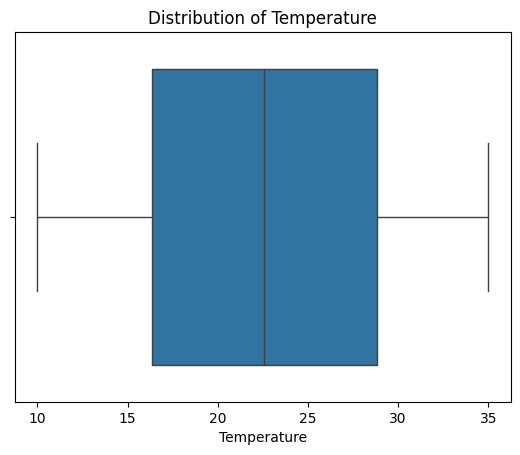

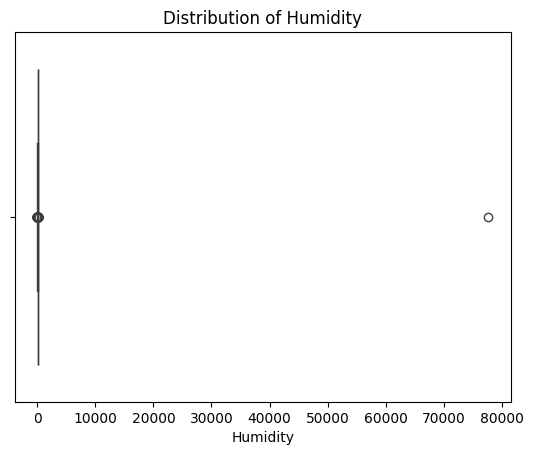

In [104]:
## Asses the numerical missing values and check for ouliers

null_missing_num_cols = ['Temperature','Humidity']

for col in null_missing_num_cols:
    sns.boxplot(data = df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

In [105]:
## It seems like Humidity has a values that are extremely high than expected ranges.

## Humidity
iqr = df['Humidity'].quantile(0.75) - df['Humidity'].quantile(0.25)
upper_limit_humidity = df['Humidity'].quantile(0.75) + 1.5 * iqr

In [106]:
print(df[df['Humidity'] > upper_limit_humidity].shape[0])
df[df['Humidity'] > upper_limit_humidity]

46


,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities
389,2002-05-10 16:00:00,2,1BHK,22.65,80.97,1.07,0.960000,Middle,0,Garden,0.0,67.46,2002,5,10,16,4,0
568,2002-07-09 08:00:00,3,Bungalow,12.82,84.29,2.16,1.280000,Upper Middle,0,NaN,1.0,123.95,2002,7,9,8,1,1
759,2002-09-11 00:00:00,4,3BHK,14.99,84.65,1.94,1.450000,Rich,1,Swimming Pool,0.0,297.55,2002,9,11,0,2,0
1614,2003-06-23 00:00:00,3,Bungalow,29.36,81.16,2.62,1.190000,Rich,1,Fountain,0.0,194.79,2003,6,23,0,0,0
1626,2003-06-27 00:00:00,3,2BHK,11.52,82.33,2.91,0.980000,Upper Middle,1,Jacuzzi,1.0,137.46,2003,6,27,0,4,0
2173,2003-12-26 08:00:00,4,Detached,22.21,77700.00,2.81,0.950000,Rich,0,Swimming Pool,1.0,246.77,2003,12,26,8,4,0
2488,2004-04-09 08:00:00,3,1BHK,33.79,83.47,1.77,1.370000,Middle,1,Fountain,0.0,166.48,2004,4,9,8,4,0
2584,2004-05-11 08:00:00,2,Cottage,19.09,81.25,1.63,0.870000,Middle,0,NaN,0.0,54.96,2004,5,11,8,1,1
3300,2005-01-05 00:00:00,3,Bungalow,12.38,86.01,2.56,1.370000,Upper Middle,0,NaN,1.0,126.79,2005,1,5,0,2,1
3423,2005-02-15 00:00:00,4,2BHK,10.52,82.48,2.46,0.870000,Upper Middle,1,Swimming Pool,0.0,131.73,2005,2,15,0,1,0


There are 46 rows that are greater than the maximum value in the humidity. There is specifically one row that seems like an entry that is erroneaus. This value will be imputed to the upper limit of the humidity column

In [107]:
df.loc[df['Timestamp'] == '2003-12-26 08:00:00']

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities
2173,2003-12-26 08:00:00,4,Detached,22.21,77700.0,2.81,0.95,Rich,0,Swimming Pool,1.0,246.77,2003,12,26,8,4,0


In [108]:
df.loc[2173, 'Humidity'] = upper_limit_humidity
df.loc[df['Timestamp'] == '2003-12-26 08:00:00']

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities
2173,2003-12-26 08:00:00,4,Detached,22.21,80.75,2.81,0.95,Rich,0,Swimming Pool,1.0,246.77,2003,12,26,8,4,0


<Axes: xlabel='Humidity'>

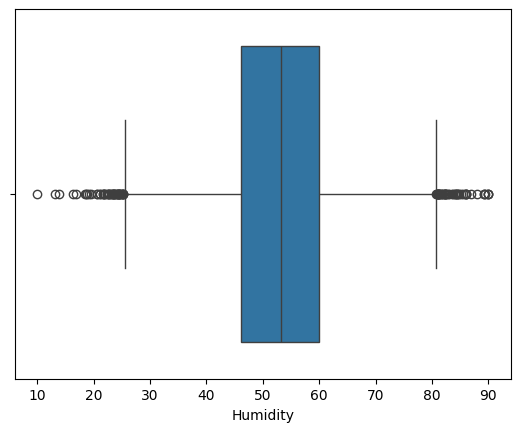

In [109]:
# Now the distribution seems valid

sns.boxplot(data = df, x = 'Humidity')

In [110]:
## Imputing the missing values with median as it has outliers

df['Humidity'] = df['Humidity'].fillna(df['Humidity'].median())

In [111]:
## Since temperature has no ouliers they are imputed with the mean
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())

In [112]:
## Imputing the Appliance_Usage column
df["Appliance_Usage"] = df["Appliance_Usage"].fillna(-1)

In [113]:
## Diving the data set for values of amenities
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
df_encoded = pd.get_dummies(df.drop(columns=["Amenities", 'Timestamp']), drop_first=True)

le = LabelEncoder()
X_train = df_encoded[df_encoded['is_null_amenities'] == 0]
X_test = df_encoded[df_encoded['is_null_amenities'] == 1]
y_train = le.fit_transform(df[df['is_null_amenities'] == 0]['Amenities'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

df.loc[df['is_null_amenities']==1, "Amenities"] = le.inverse_transform(rf.predict(X_test))


In [114]:
df['Amenities'].unique()

array(['Swimming Pool', 'Garden', 'Fountain', 'Jacuzzi'], dtype=object)

The Amenities column is imputed by Random Forest Classifier

In [115]:
df.isnull().sum()

Timestamp                   0
Residents                   0
Apartment_Type              0
Temperature                 0
Humidity                    0
Water_Price                 0
Period_Consumption_Index    0
Income_Level                0
Guests                      0
Amenities                   0
Appliance_Usage             0
Water_Consumption           0
Year                        0
Month                       0
Day                         0
Hour                        0
Week                        0
is_null_amenities           0
dtype: int64

## Handling Outliers

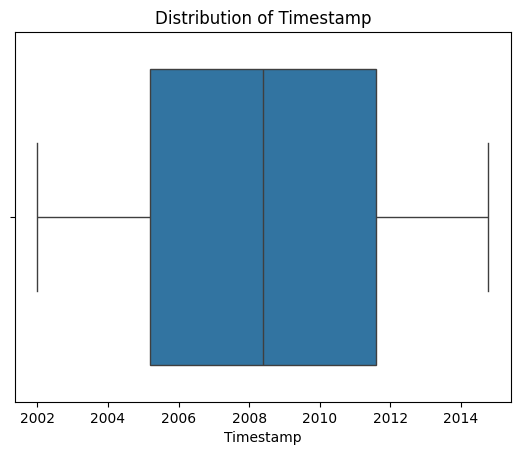

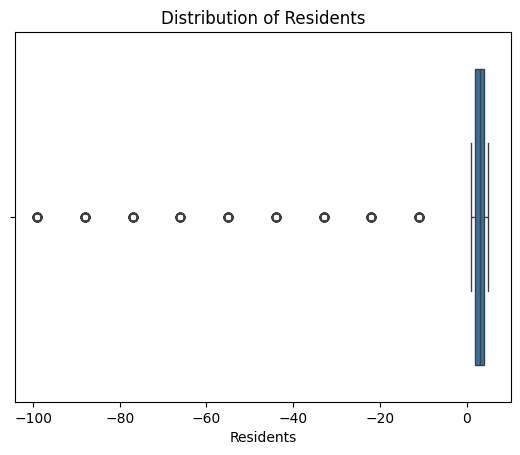

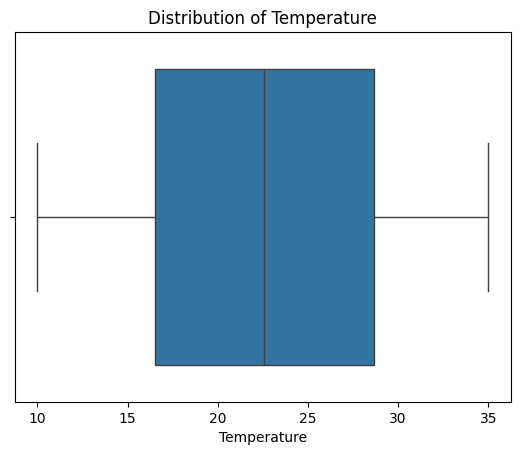

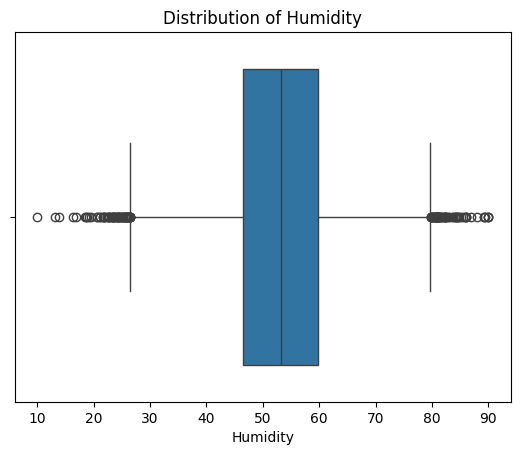

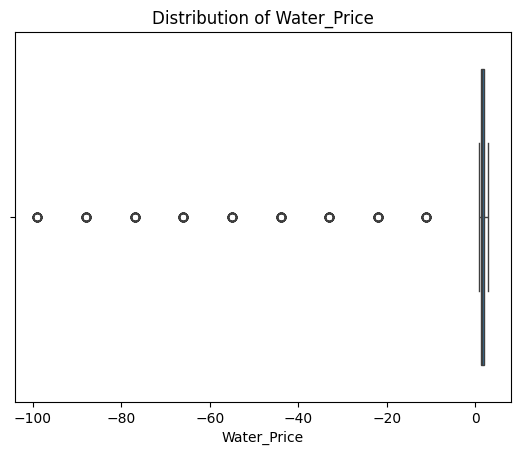

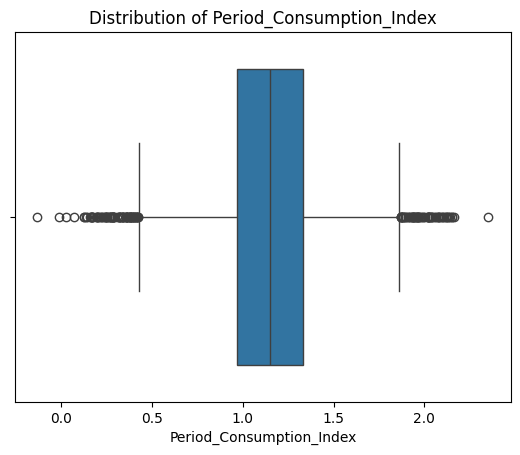

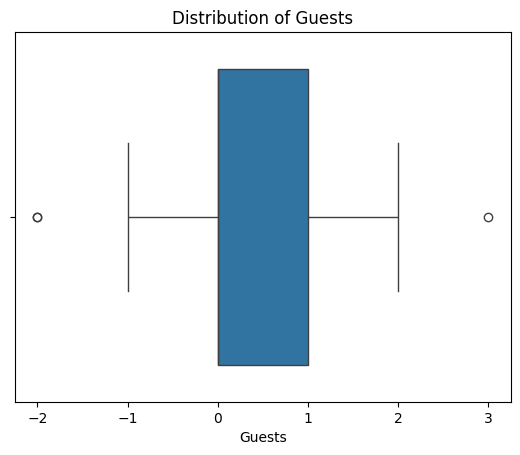

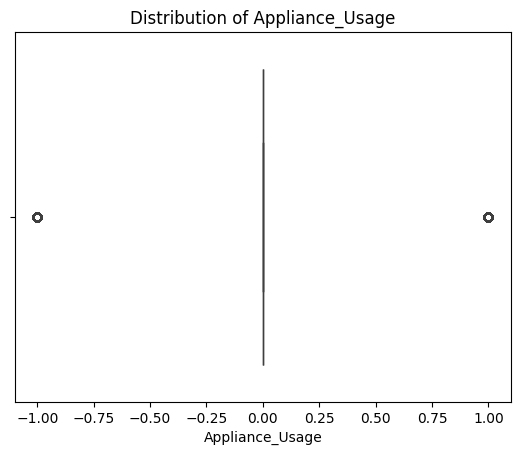

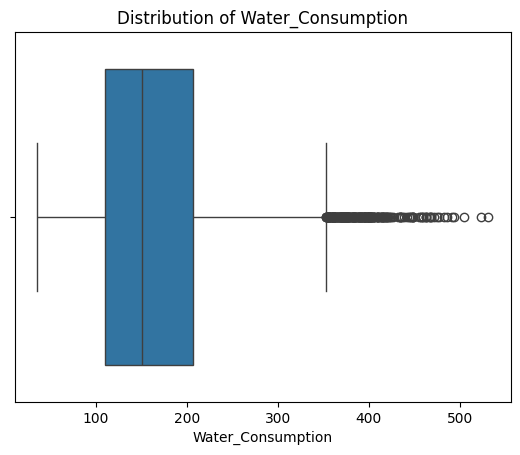

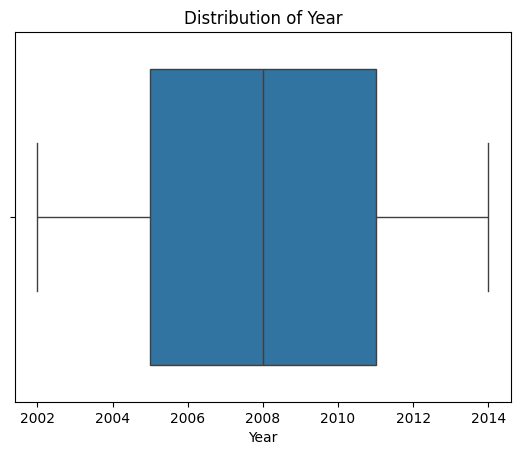

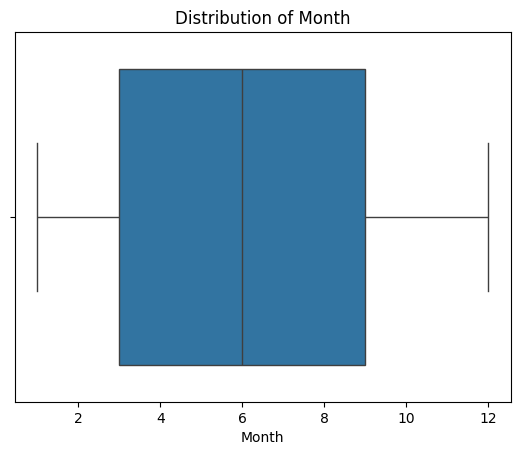

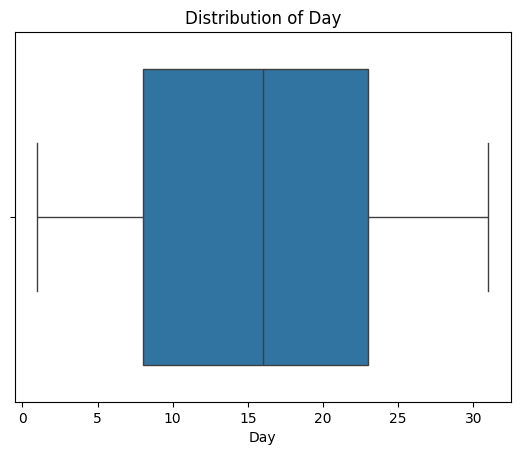

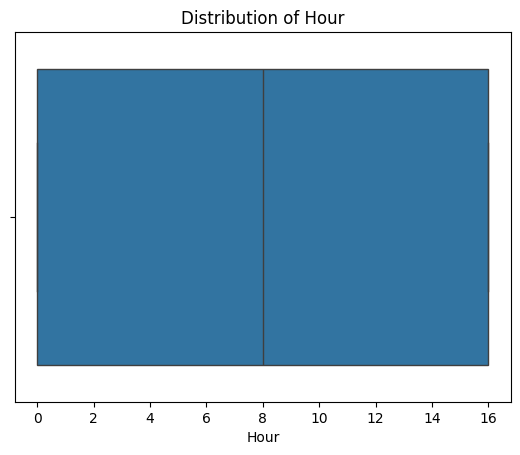

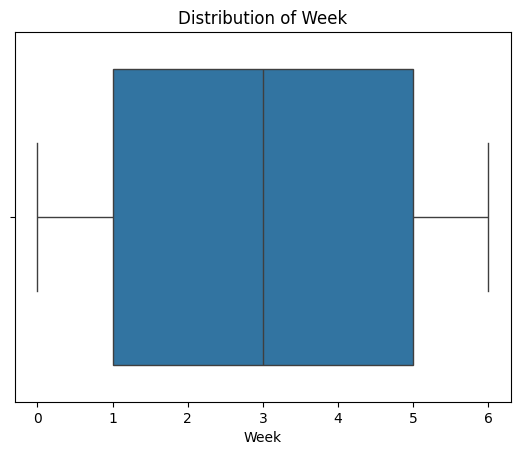

In [116]:
for col in num_cols:
    sns.boxplot(data = df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

In [117]:
for col in num_cols:
    if col not in ['Water_Consumption','Appliance_Usage','Guests']:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + 1.5*iqr
        lower_bound = q1 - 1.5*iqr

        df[col] = df[col].clip(lower_bound,upper_bound)

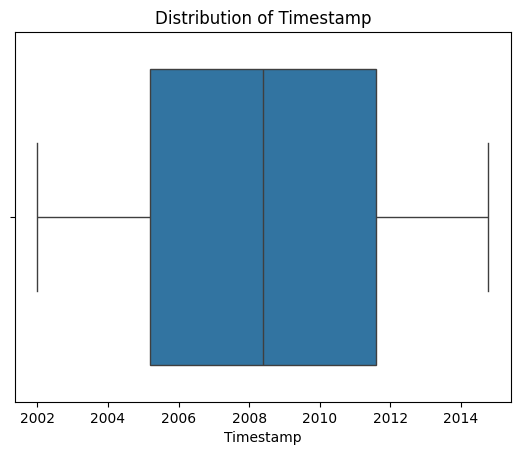

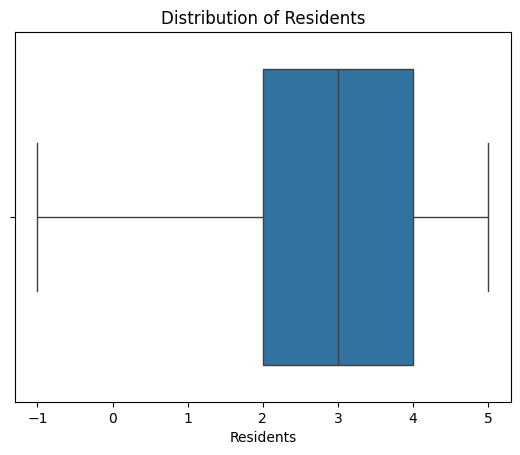

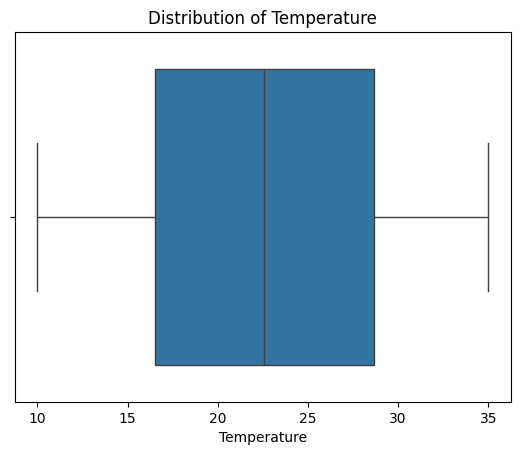

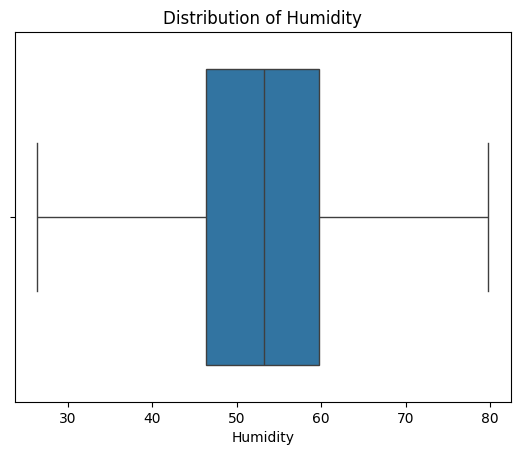

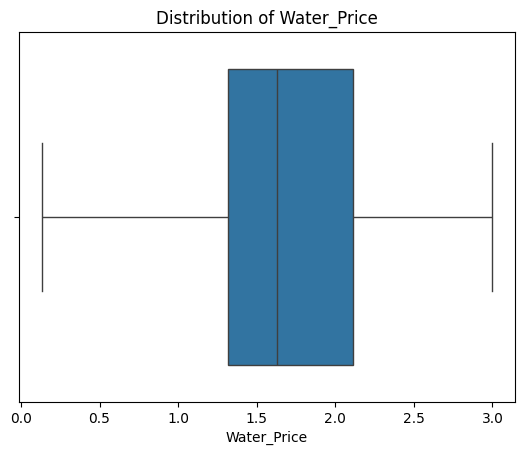

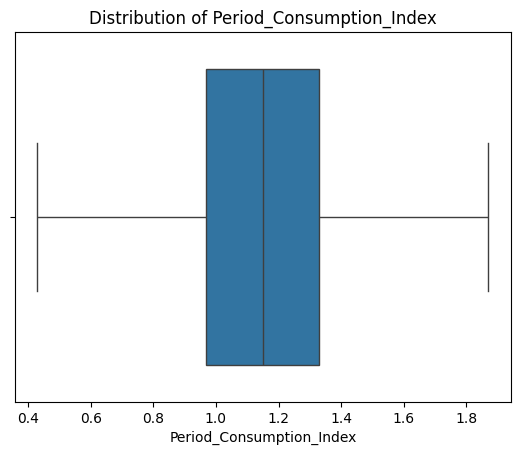

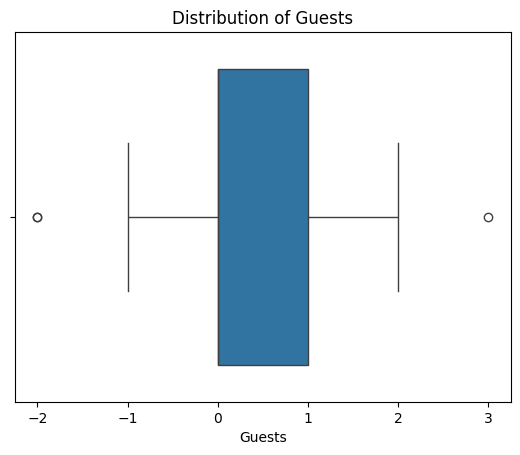

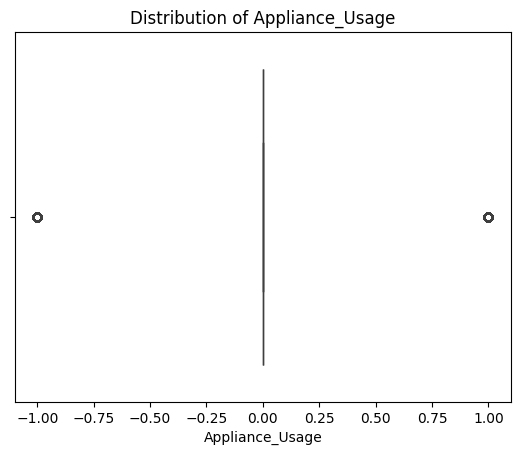

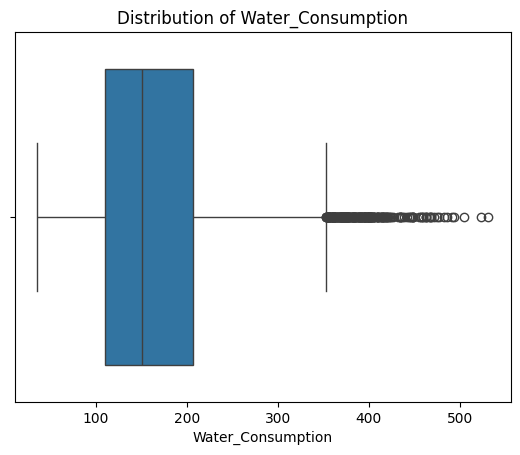

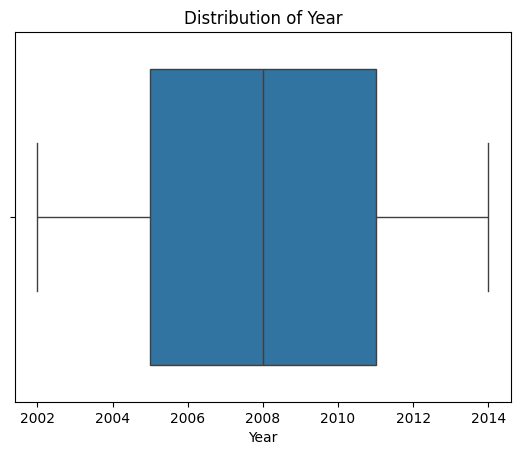

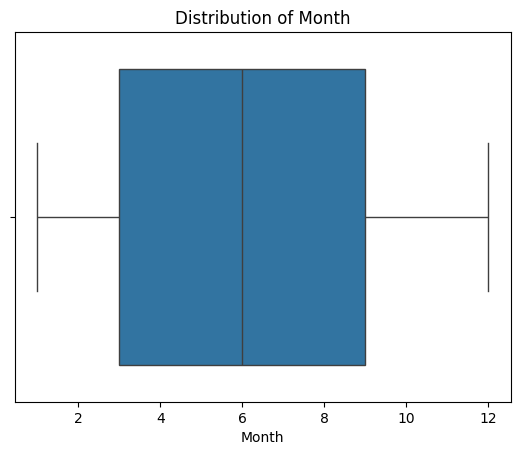

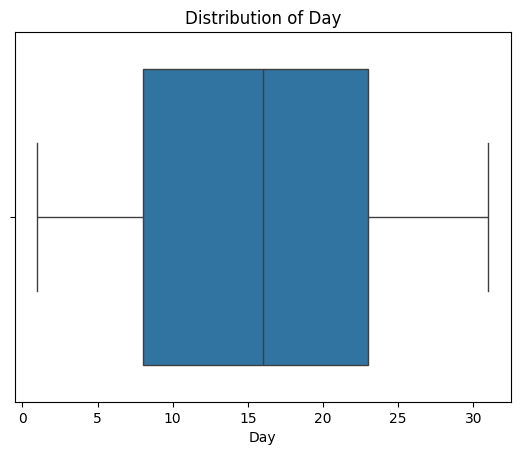

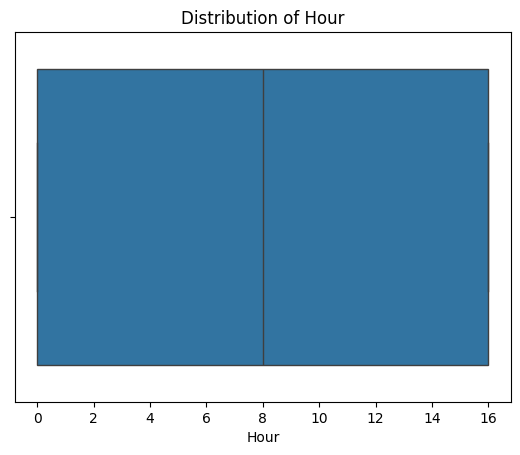

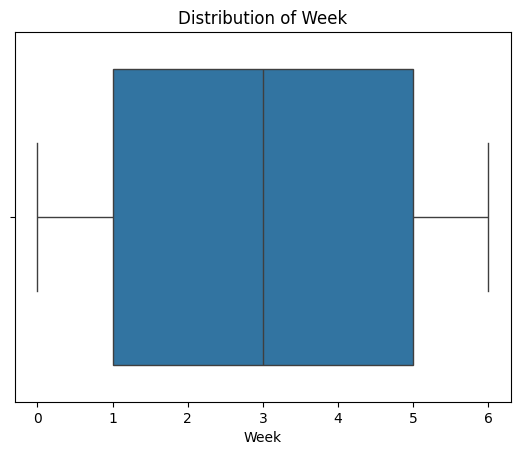

In [118]:
for col in num_cols:
    sns.boxplot(data = df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

In [119]:
## Guests have values less than 0. Let's Examine

df[df['Guests'] < 0]['Guests'].value_counts()

## There are 2 rows where guests is -2. Let's change it to -1 for unknown
df.loc[df['Guests']<-1, 'Guests'] = -1

In [120]:
df[df['Guests'] < 0]['Guests'].value_counts()


Guests
-1    153
Name: count, dtype: int64

In [121]:
df['Income_Level'].unique()

array(['Low', 'Upper Middle', 'Middle', 'Unknown', 'Rich'], dtype=object)

In [122]:
## Label Encode Income Level
df['Income_Level'] = df['Income_Level'].replace({'Unknown':1, 'Low':2, 'Middle':3, 'Upper Middle':4, 'Rich':5})

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_21780\2628287407.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Income_Level'] = df['Income_Level'].replace({'Unknown':1, 'Low':2, 'Middle':3, 'Upper Middle':4, 'Rich':5})


In [123]:
pd.set_option('display.max_columns', None)  # Show all columns

In [124]:
# encoding the categorical variables
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)
df_encoded = df_encoded.drop(columns='Timestamp')
df_encoded

,Residents,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities,Apartment_Type_2BHK,Apartment_Type_3BHK,Apartment_Type_Bungalow,Apartment_Type_Cottage,Apartment_Type_Detached,Apartment_Type_Studio,Apartment_Type_Unknown,Amenities_Garden,Amenities_Jacuzzi,Amenities_Swimming Pool
0,1,15.310000,46.61,1.06,0.97,2,0,0.0,64.85,2002,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,4,21.010000,66.11,2.98,0.91,4,1,1.0,192.50,2002,1,1,8,1,0,0,0,0,0,0,0,1,0,0,1
2,2,12.860000,60.86,1.44,1.43,3,0,1.0,116.62,2002,1,1,16,1,1,0,0,0,1,0,0,0,1,0,0
3,2,20.160000,50.58,1.48,0.91,3,-1,0.0,76.96,2002,1,2,0,2,0,0,0,0,0,0,0,0,1,0,0
4,2,16.230000,52.25,1.14,1.11,3,0,0.0,104.70,2002,1,2,8,2,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2,25.610000,61.50,1.70,0.94,2,0,0.0,78.59,2014,10,10,0,4,1,0,0,0,0,0,0,0,1,0,0
13996,5,13.270000,52.58,1.88,1.03,4,0,1.0,185.50,2014,10,10,8,4,0,1,0,0,0,0,0,0,1,0,0
13997,4,22.566559,46.93,1.22,1.10,3,0,1.0,180.28,2014,10,10,16,4,1,1,0,0,0,0,0,0,1,0,0
13998,4,11.620000,64.48,2.86,1.12,4,1,0.0,212.19,2014,10,11,0,5,0,0,1,0,0,0,0,0,0,0,1


## Feature Engineering

In [125]:

## interaction features

df_encoded['Temp_WaterPrice_Interaction'] = df_encoded['Temperature'] * df_encoded['Water_Price']
df_encoded['Guests_ApplianceUsage_Interaction'] = df_encoded['Guests'] * df_encoded['Appliance_Usage']
df_encoded['Residents_ApplianceUsage_Interaction'] = df_encoded['Residents'] * df_encoded['Appliance_Usage']

In [126]:
## Polynomial Features

df_encoded['Temperature_Squared'] = df_encoded['Temperature'] ** 2
df_encoded['Humidity_Squared'] = df_encoded['Humidity'] ** 2
df_encoded['WaterPrice_Squared'] = df_encoded['Water_Price'] ** 2
df_encoded['ApplianceUsage_Squared'] = df_encoded['Appliance_Usage'] ** 2
df_encoded['Residents_Squared'] = df_encoded['Residents'] ** 2
df_encoded

,Residents,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities,Apartment_Type_2BHK,Apartment_Type_3BHK,Apartment_Type_Bungalow,Apartment_Type_Cottage,Apartment_Type_Detached,Apartment_Type_Studio,Apartment_Type_Unknown,Amenities_Garden,Amenities_Jacuzzi,Amenities_Swimming Pool,Temp_WaterPrice_Interaction,Guests_ApplianceUsage_Interaction,Residents_ApplianceUsage_Interaction,Temperature_Squared,Humidity_Squared,WaterPrice_Squared,ApplianceUsage_Squared,Residents_Squared
0,1,15.310000,46.61,1.06,0.97,2,0,0.0,64.85,2002,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,16.228600,0.0,0.0,234.396100,2172.4921,1.1236,0.0,1
1,4,21.010000,66.11,2.98,0.91,4,1,1.0,192.50,2002,1,1,8,1,0,0,0,0,0,0,0,1,0,0,1,62.609800,1.0,4.0,441.420100,4370.5321,8.8804,1.0,16
2,2,12.860000,60.86,1.44,1.43,3,0,1.0,116.62,2002,1,1,16,1,1,0,0,0,1,0,0,0,1,0,0,18.518400,0.0,2.0,165.379600,3703.9396,2.0736,1.0,4
3,2,20.160000,50.58,1.48,0.91,3,-1,0.0,76.96,2002,1,2,0,2,0,0,0,0,0,0,0,0,1,0,0,29.836800,-0.0,0.0,406.425600,2558.3364,2.1904,0.0,4
4,2,16.230000,52.25,1.14,1.11,3,0,0.0,104.70,2002,1,2,8,2,0,0,0,0,1,0,0,0,0,0,0,18.502200,0.0,0.0,263.412900,2730.0625,1.2996,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2,25.610000,61.50,1.70,0.94,2,0,0.0,78.59,2014,10,10,0,4,1,0,0,0,0,0,0,0,1,0,0,43.537000,0.0,0.0,655.872100,3782.2500,2.8900,0.0,4
13996,5,13.270000,52.58,1.88,1.03,4,0,1.0,185.50,2014,10,10,8,4,0,1,0,0,0,0,0,0,1,0,0,24.947600,0.0,5.0,176.092900,2764.6564,3.5344,1.0,25
13997,4,22.566559,46.93,1.22,1.10,3,0,1.0,180.28,2014,10,10,16,4,1,1,0,0,0,0,0,0,1,0,0,27.531203,0.0,4.0,509.249607,2202.4249,1.4884,1.0,16
13998,4,11.620000,64.48,2.86,1.12,4,1,0.0,212.19,2014,10,11,0,5,0,0,1,0,0,0,0,0,0,0,1,33.233200,0.0,0.0,135.024400,4157.6704,8.1796,0.0,16


In [127]:
## Ratio based features

df_encoded['Appliance_Usage_Per_Resident'] = df_encoded['Appliance_Usage'] / (df_encoded['Residents'].replace({-1: 0}) + 1)
df_encoded['Guests_Per_Resident'] = df_encoded['Guests'] / (df_encoded['Residents'].replace({-1: 0}) + 1)

In [128]:
## Binary Flags
df_encoded['High_Temp_Flag'] = (df_encoded['Temperature'] > 30).astype(int)
df_encoded['High_Humidity_Flag'] = (df_encoded['Humidity'] > 80).astype(int)
df_encoded['Many_Residents_Flag'] = (df_encoded['Residents'] > 4).astype(int)
df_encoded['Peak_Hour_Flag'] = df_encoded['Hour'].isin([6, 7, 8, 18, 19, 20]).astype(int)

In [129]:
df_encoded

,Residents,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities,Apartment_Type_2BHK,Apartment_Type_3BHK,Apartment_Type_Bungalow,Apartment_Type_Cottage,Apartment_Type_Detached,Apartment_Type_Studio,Apartment_Type_Unknown,Amenities_Garden,Amenities_Jacuzzi,Amenities_Swimming Pool,Temp_WaterPrice_Interaction,Guests_ApplianceUsage_Interaction,Residents_ApplianceUsage_Interaction,Temperature_Squared,Humidity_Squared,WaterPrice_Squared,ApplianceUsage_Squared,Residents_Squared,Appliance_Usage_Per_Resident,Guests_Per_Resident,High_Temp_Flag,High_Humidity_Flag,Many_Residents_Flag,Peak_Hour_Flag
0,1,15.310000,46.61,1.06,0.97,2,0,0.0,64.85,2002,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,16.228600,0.0,0.0,234.396100,2172.4921,1.1236,0.0,1,0.000000,0.000000,0,0,0,0
1,4,21.010000,66.11,2.98,0.91,4,1,1.0,192.50,2002,1,1,8,1,0,0,0,0,0,0,0,1,0,0,1,62.609800,1.0,4.0,441.420100,4370.5321,8.8804,1.0,16,0.200000,0.200000,0,0,0,1
2,2,12.860000,60.86,1.44,1.43,3,0,1.0,116.62,2002,1,1,16,1,1,0,0,0,1,0,0,0,1,0,0,18.518400,0.0,2.0,165.379600,3703.9396,2.0736,1.0,4,0.333333,0.000000,0,0,0,0
3,2,20.160000,50.58,1.48,0.91,3,-1,0.0,76.96,2002,1,2,0,2,0,0,0,0,0,0,0,0,1,0,0,29.836800,-0.0,0.0,406.425600,2558.3364,2.1904,0.0,4,0.000000,-0.333333,0,0,0,0
4,2,16.230000,52.25,1.14,1.11,3,0,0.0,104.70,2002,1,2,8,2,0,0,0,0,1,0,0,0,0,0,0,18.502200,0.0,0.0,263.412900,2730.0625,1.2996,0.0,4,0.000000,0.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2,25.610000,61.50,1.70,0.94,2,0,0.0,78.59,2014,10,10,0,4,1,0,0,0,0,0,0,0,1,0,0,43.537000,0.0,0.0,655.872100,3782.2500,2.8900,0.0,4,0.000000,0.000000,0,0,0,0
13996,5,13.270000,52.58,1.88,1.03,4,0,1.0,185.50,2014,10,10,8,4,0,1,0,0,0,0,0,0,1,0,0,24.947600,0.0,5.0,176.092900,2764.6564,3.5344,1.0,25,0.166667,0.000000,0,0,1,1
13997,4,22.566559,46.93,1.22,1.10,3,0,1.0,180.28,2014,10,10,16,4,1,1,0,0,0,0,0,0,1,0,0,27.531203,0.0,4.0,509.249607,2202.4249,1.4884,1.0,16,0.200000,0.000000,0,0,0,0
13998,4,11.620000,64.48,2.86,1.12,4,1,0.0,212.19,2014,10,11,0,5,0,0,1,0,0,0,0,0,0,0,1,33.233200,0.0,0.0,135.024400,4157.6704,8.1796,0.0,16,0.000000,0.200000,0,0,0,0


In [131]:
# Weekend Flag (Saturday = 5, Sunday = 6)
df_encoded["Weekend_Flag"] = df_encoded["Week"].isin([5, 6]).astype(int)

# Morning Flag (8 AM only, since no 6, 7, 9, 10 exist)
df_encoded["Morning_Flag"] = (df_encoded["Hour"] == 8).astype(int)

# Evening Flag (16 means 4 PM, not evening)
df_encoded["Evening_Flag"] = (df_encoded["Hour"] == 16).astype(int)

# Winter Flag (December, January, February)
df_encoded["Winter_Flag"] = df_encoded["Month"].isin([12, 1, 2]).astype(int)

# Summer Flag (June, July, August)
df_encoded["Summer_Flag"] = df_encoded["Month"].isin([6, 7, 8]).astype(int)

In [132]:
df_encoded

,Residents,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities,Apartment_Type_2BHK,Apartment_Type_3BHK,Apartment_Type_Bungalow,Apartment_Type_Cottage,Apartment_Type_Detached,Apartment_Type_Studio,Apartment_Type_Unknown,Amenities_Garden,Amenities_Jacuzzi,Amenities_Swimming Pool,Temp_WaterPrice_Interaction,Guests_ApplianceUsage_Interaction,Residents_ApplianceUsage_Interaction,Temperature_Squared,Humidity_Squared,WaterPrice_Squared,ApplianceUsage_Squared,Residents_Squared,Appliance_Usage_Per_Resident,Guests_Per_Resident,High_Temp_Flag,High_Humidity_Flag,Many_Residents_Flag,Peak_Hour_Flag,Weekend_Flag,Morning_Flag,Evening_Flag,Winter_Flag,Summer_Flag
0,1,15.310000,46.61,1.06,0.97,2,0,0.0,64.85,2002,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,16.228600,0.0,0.0,234.396100,2172.4921,1.1236,0.0,1,0.000000,0.000000,0,0,0,0,0,0,0,1,0
1,4,21.010000,66.11,2.98,0.91,4,1,1.0,192.50,2002,1,1,8,1,0,0,0,0,0,0,0,1,0,0,1,62.609800,1.0,4.0,441.420100,4370.5321,8.8804,1.0,16,0.200000,0.200000,0,0,0,1,0,1,0,1,0
2,2,12.860000,60.86,1.44,1.43,3,0,1.0,116.62,2002,1,1,16,1,1,0,0,0,1,0,0,0,1,0,0,18.518400,0.0,2.0,165.379600,3703.9396,2.0736,1.0,4,0.333333,0.000000,0,0,0,0,0,0,1,1,0
3,2,20.160000,50.58,1.48,0.91,3,-1,0.0,76.96,2002,1,2,0,2,0,0,0,0,0,0,0,0,1,0,0,29.836800,-0.0,0.0,406.425600,2558.3364,2.1904,0.0,4,0.000000,-0.333333,0,0,0,0,0,0,0,1,0
4,2,16.230000,52.25,1.14,1.11,3,0,0.0,104.70,2002,1,2,8,2,0,0,0,0,1,0,0,0,0,0,0,18.502200,0.0,0.0,263.412900,2730.0625,1.2996,0.0,4,0.000000,0.000000,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2,25.610000,61.50,1.70,0.94,2,0,0.0,78.59,2014,10,10,0,4,1,0,0,0,0,0,0,0,1,0,0,43.537000,0.0,0.0,655.872100,3782.2500,2.8900,0.0,4,0.000000,0.000000,0,0,0,0,0,0,0,0,0
13996,5,13.270000,52.58,1.88,1.03,4,0,1.0,185.50,2014,10,10,8,4,0,1,0,0,0,0,0,0,1,0,0,24.947600,0.0,5.0,176.092900,2764.6564,3.5344,1.0,25,0.166667,0.000000,0,0,1,1,0,1,0,0,0
13997,4,22.566559,46.93,1.22,1.10,3,0,1.0,180.28,2014,10,10,16,4,1,1,0,0,0,0,0,0,1,0,0,27.531203,0.0,4.0,509.249607,2202.4249,1.4884,1.0,16,0.200000,0.000000,0,0,0,0,0,0,1,0,0
13998,4,11.620000,64.48,2.86,1.12,4,1,0.0,212.19,2014,10,11,0,5,0,0,1,0,0,0,0,0,0,0,1,33.233200,0.0,0.0,135.024400,4157.6704,8.1796,0.0,16,0.000000,0.200000,0,0,0,0,1,0,0,0,0


## Understanding the feature importances

In [133]:
## Checking for multi-colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_encoded.drop(columns='Water_Consumption')
y = df_encoded['Water_Consumption']

vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by = 'VIF', ascending=False)

c:\Vipina\FindJ\Resume\Coursera\Hackathon\WaterConsumption\venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Vipina\FindJ\Resume\Coursera\Hackathon\WaterConsumption\venv\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
11,Hour,inf
39,Morning_Flag,inf
37,Peak_Hour_Flag,inf
40,Evening_Flag,inf
2,Humidity,1805.544077
1,Temperature,1055.056856
8,Year,795.353424
28,Humidity_Squared,520.749615
27,Temperature_Squared,431.957961
3,Water_Price,306.739492


There are some features that have greater values of VIF. Lets do correlation analysis

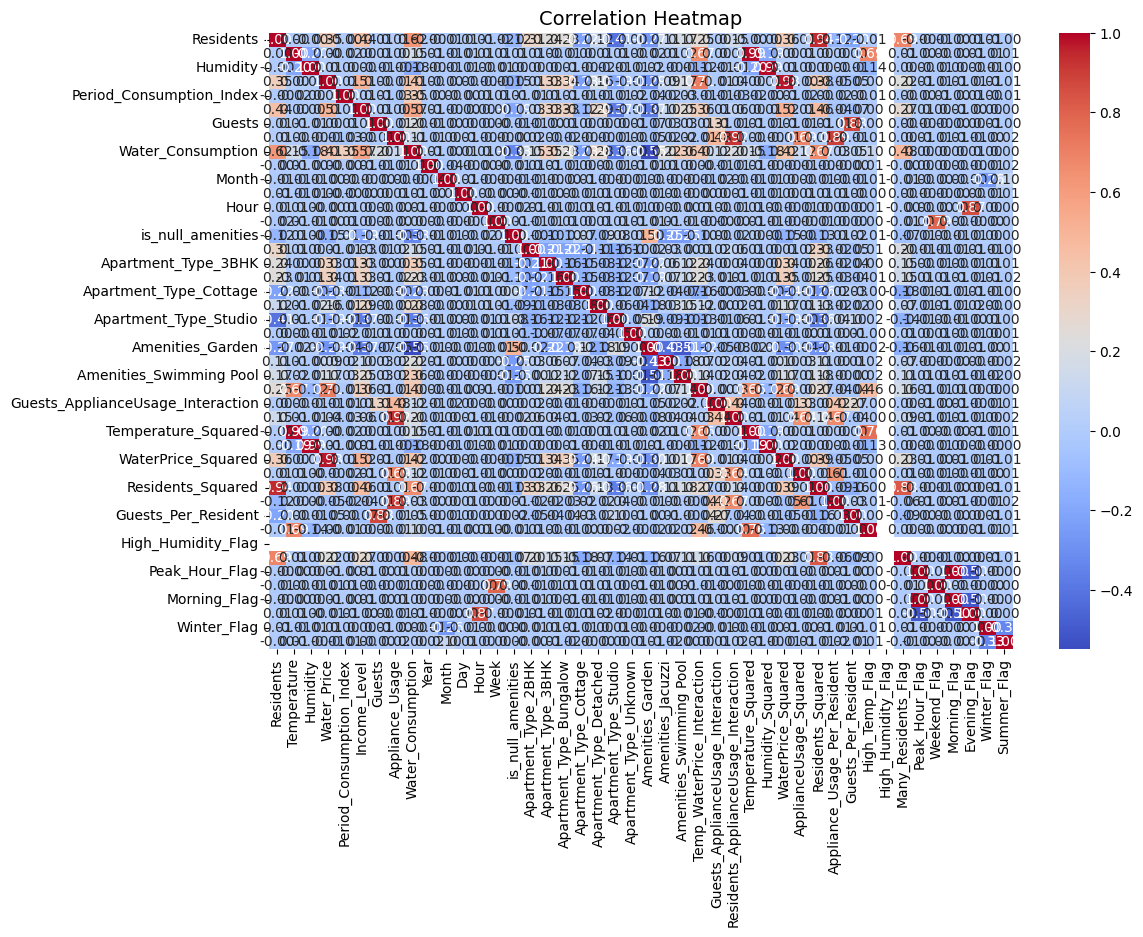

In [134]:
## Correlation Analysis

corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [135]:
## search for highly correlated columns
# Set a correlation threshold
threshold = 0.85

# Iterate through the correlation matrix to identify highly correlated columns
high_corr = []
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col not in  ['Water_Consumption'] and idx not in  ['Water_consumption']:
            if col != idx and abs(corr_matrix.loc[col, idx]) >= threshold:
                high_corr.append((col, idx))

# Display the highly correlated pairs
high_corr = list(set(tuple(sorted(pair)) for pair in high_corr))
high_corr

[('WaterPrice_Squared', 'Water_Price'),
 ('Guests', 'Guests_Per_Resident'),
 ('Residents', 'Residents_Squared'),
 ('Appliance_Usage', 'Appliance_Usage_Per_Resident'),
 ('Temperature', 'Temperature_Squared'),
 ('Appliance_Usage', 'Residents_ApplianceUsage_Interaction'),
 ('Morning_Flag', 'Peak_Hour_Flag'),
 ('Humidity', 'Humidity_Squared'),
 ('Evening_Flag', 'Hour')]

So there are few columns that are highly correlated

In [136]:
import statsmodels.api as sm

X = df_encoded.drop(columns='Water_Consumption')
y = df_encoded['Water_Consumption']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Water_Consumption   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     2825.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:44:55   Log-Likelihood:                -64453.
No. Observations:               14000   AIC:                         1.290e+05
Df Residuals:                   13959   BIC:                         1.293e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -110.5639    111.677     -0.990      0.322    -329.466     108.338
Residents                              -18.4619      0.664    -27.815      0.000     -19.763     -17.161
Temperature                              0.3950      0.281      1.406      0.160      -0.156       0.946
Humidity                                -1.2417      0.161     -7.722      0.000      -1.557      -0.927
Water_Price                             -4.1683      1.964     -2.122      0.034      -8.018      -0.318
Period_Consumption_Index               113.6319      0.918    123.798      0.000     111.833     115.431
Income_Level                             7.7304      0.287     26.919      0.000       7.168       8.293
Guests                                  34.9548      0.993     35.196      0.000      33.008      36.901
Appliance_Usage                        -15.3508      4.215     -3.642      0.000     -23.613      -7.089
Year                                     0.0658      0.056      1.183      0.237      -0.043       0.175
Month                                    0.0095      0.062      0.154      0.878      -0.112       0.131
Day                                      0.0222      0.023      0.956      0.339      -0.023       0.068
Hour                                     0.0450      0.032      1.416      0.157      -0.017       0.107
Week                                     0.1038      0.167      0.621      0.535      -0.224       0.431
is_null_amenities                      -17.2508      0.480    -35.923      0.000     -18.192     -16.309
Apartment_Type_2BHK                     13.8774      0.816     17.008      0.000      12.278      15.477
Apartment_Type_3BHK                     43.9674      1.025     42.892      0.000      41.958      45.977
Apartment_Type_Bungalow                 24.3967      1.018     23.959      0.000      22.401      26.393
Apartment_Type_Cottage                   1.0738      0.727      1.478      0.140      -0.351       2.498
Apartment_Type_Detached                 66.1706      1.407     47.017      0.000      63.412      68.929
Apartment_Type_Studio                  -19.1392      0.891    -21.469      0.000     -20.887     -17.392
Apartment_Type_Unknown                  11.0846      1.298      8.538      0.000       8.540      13.629
Amenities_Garden                       -17.5936      0.680    -25.862      0.000     -18.927     -16.260
Amenities_Jacuzzi                        9.3053      0.782     11.902      0.000       7.773      10.838
Amenities_Swimming Pool                 16.9342      0.727     23.288      0.000      15.509      18.360
Temp_WaterPrice_Interaction              0.4729      0.049      9.602      0.000       0.376       0.569
Guests_ApplianceUsage_Interaction     

As per the VIF, correlation matrix and OLS, the columns 'Year', 'Month','Day','Hour', 'Residents', 'Temperature','Humidity','Water_Price','Apartment_Type_Cottage','Period_Consumption_Index' do not have any significance in predicting the output. But let's retain temperature and remove humidity as they can be correlated, also lets retain water_price ,Period_Consumption_Index and residents as sometimes they can act as the deciding factor

Also performing cyclical transformation on date variables lets check for correlation again

In [137]:
columns_to_drop = [
    "Hour", "Morning_Flag", "Peak_Hour_Flag", "Evening_Flag",
    "WaterPrice_Squared", "Guests_Per_Resident", "Residents_Squared",
    "Appliance_Usage_Per_Resident", "Temperature_Squared", 
    "Residents_ApplianceUsage_Interaction", "Humidity_Squared", 'Year', 'Month', 'Day', 'Hour', 'Apartment_Type_Cottage']

In [138]:
from sklearn.preprocessing import MinMaxScaler
# Hour (cyclical transformation)
df_encoded['Hour_sin'] = np.sin(2 * np.pi * df_encoded['Hour'] / 24)
df_encoded['Hour_cos'] = np.cos(2 * np.pi * df_encoded['Hour'] / 24)

# Month (cyclical transformation)
df_encoded['Month_sin'] = np.sin(2 * np.pi * df_encoded['Month'] / 12)
df_encoded['Month_cos'] = np.cos(2 * np.pi * df_encoded['Month'] / 12)

# Day (cyclical transformation) - assuming max days = 31
df_encoded['Day_sin'] = np.sin(2 * np.pi * df_encoded['Day'] / 31)
df_encoded['Day_cos'] = np.cos(2 * np.pi * df_encoded['Day'] / 31)

min_max_scaler = MinMaxScaler()
df_encoded['Year'] = min_max_scaler.fit_transform(df_encoded[['Year']])

# Drop the original time-related columns
df_encoded = df_encoded.drop(columns=columns_to_drop)
df_encoded

,Residents,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Appliance_Usage,Water_Consumption,Week,is_null_amenities,Apartment_Type_2BHK,Apartment_Type_3BHK,Apartment_Type_Bungalow,Apartment_Type_Detached,Apartment_Type_Studio,Apartment_Type_Unknown,Amenities_Garden,Amenities_Jacuzzi,Amenities_Swimming Pool,Temp_WaterPrice_Interaction,Guests_ApplianceUsage_Interaction,ApplianceUsage_Squared,High_Temp_Flag,High_Humidity_Flag,Many_Residents_Flag,Weekend_Flag,Winter_Flag,Summer_Flag,Hour_sin,Hour_cos,Month_sin,Month_cos,Day_sin,Day_cos
0,1,15.310000,46.61,1.06,0.97,2,0,0.0,64.85,1,0,0,0,0,0,1,0,0,0,1,16.228600,0.0,0.0,0,0,0,0,1,0,0.000000,1.0,0.500000,0.866025,0.201299,0.979530
1,4,21.010000,66.11,2.98,0.91,4,1,1.0,192.50,1,0,0,0,0,0,0,1,0,0,1,62.609800,1.0,1.0,0,0,0,0,1,0,0.866025,-0.5,0.500000,0.866025,0.201299,0.979530
2,2,12.860000,60.86,1.44,1.43,3,0,1.0,116.62,1,1,0,0,0,0,0,0,1,0,0,18.518400,0.0,1.0,0,0,0,0,1,0,-0.866025,-0.5,0.500000,0.866025,0.201299,0.979530
3,2,20.160000,50.58,1.48,0.91,3,-1,0.0,76.96,2,0,0,0,0,0,0,0,1,0,0,29.836800,-0.0,0.0,0,0,0,0,1,0,0.000000,1.0,0.500000,0.866025,0.394356,0.918958
4,2,16.230000,52.25,1.14,1.11,3,0,0.0,104.70,2,0,0,0,0,0,0,0,0,0,0,18.502200,0.0,0.0,0,0,0,0,1,0,0.866025,-0.5,0.500000,0.866025,0.394356,0.918958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2,25.610000,61.50,1.70,0.94,2,0,0.0,78.59,4,1,0,0,0,0,0,0,1,0,0,43.537000,0.0,0.0,0,0,0,0,0,0,0.000000,1.0,-0.866025,0.500000,0.897805,-0.440394
13996,5,13.270000,52.58,1.88,1.03,4,0,1.0,185.50,4,0,1,0,0,0,0,0,1,0,0,24.947600,0.0,1.0,0,0,1,0,0,0,0.866025,-0.5,-0.866025,0.500000,0.897805,-0.440394
13997,4,22.566559,46.93,1.22,1.10,3,0,1.0,180.28,4,1,1,0,0,0,0,0,1,0,0,27.531203,0.0,1.0,0,0,0,0,0,0,-0.866025,-0.5,-0.866025,0.500000,0.897805,-0.440394
13998,4,11.620000,64.48,2.86,1.12,4,1,0.0,212.19,5,0,0,1,0,0,0,0,0,0,1,33.233200,0.0,0.0,0,0,0,1,0,0,0.000000,1.0,-0.866025,0.500000,0.790776,-0.612106


## Re-analyze the correlation and variance inflation

In [139]:
X = df_encoded.drop(columns='Water_Consumption')
y = df_encoded['Water_Consumption']
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by = 'VIF', ascending=False)

c:\Vipina\FindJ\Resume\Coursera\Hackathon\WaterConsumption\venv\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
3,Water_Price,66.027761
19,Temp_WaterPrice_Interaction,64.167370
1,Temperature,57.712659
2,Humidity,25.619004
4,Period_Consumption_Index,24.081658
5,Income_Level,21.049326
0,Residents,20.613916
8,Week,8.584886
16,Amenities_Garden,5.783157
31,Month_cos,4.659216


Only Waterprice,  Temp_WaterPrice_Interaction, Temperature, Humidity, Period_Consumption_Index, Income_Level, and Residents have high VIF

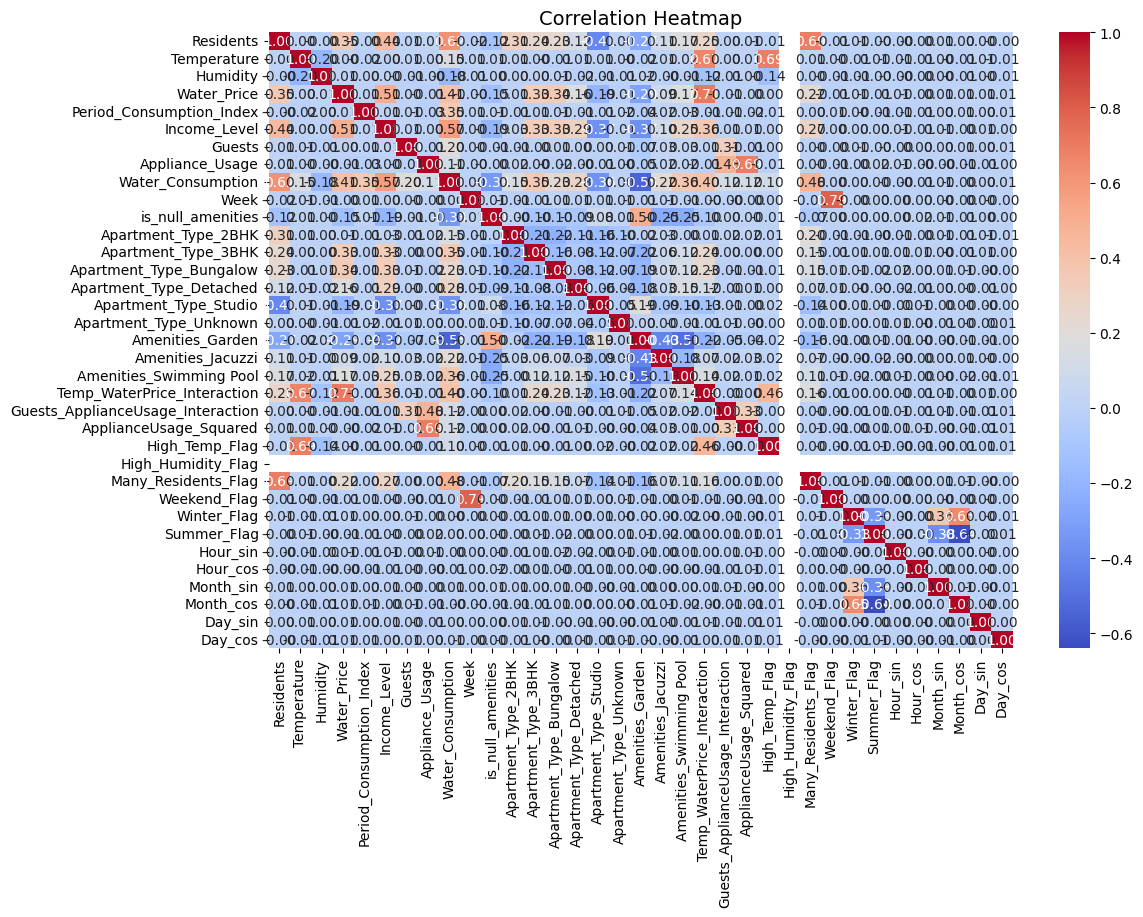

In [140]:
## Correlation Analysis

corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [141]:
## search for highly correlated columns
# Set a correlation threshold
threshold = 0.85

# Iterate through the correlation matrix to identify highly correlated columns
high_corr = []
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col not in  ['Water_Consumption'] and idx not in  ['Water_consumption']:
            if col != idx and abs(corr_matrix.loc[col, idx]) >= threshold:
                high_corr.append((col, idx))

# Display the highly correlated pairs
high_corr = list(set(tuple(sorted(pair)) for pair in high_corr))
high_corr

[]

None of the column are highly correlated. Since, Temperature, period consumption Index, water price, temperature are directly connected to Water consumption, they can be retained.

In [142]:
## Feature importance through OLS

X = sm.add_constant(X)
y = df_encoded['Water_Consumption']
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Water_Consumption   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     2798.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:59:07   Log-Likelihood:                -65700.
No. Observations:               14000   AIC:                         1.315e+05
Df Residuals:                   13966   BIC:                         1.317e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.4491      3.278      1.052      0.293      -2.976       9.874
Residents                            10.0669      0.307     32.757      0.000       9.465      10.669
Temperature                           0.5360      0.103      5.200      0.000       0.334       0.738
Humidity                             -1.1101      0.023    -48.422      0.000      -1.155      -1.065
Water_Price                         -13.4738      1.315    -10.248      0.000     -16.051     -10.897
Period_Consumption_Index            113.5363      1.003    113.209      0.000     111.571     115.502
Income_Level                          7.7011      0.310     24.850      0.000       7.094       8.309
Guests                               25.6665      0.492     52.196      0.000      24.703      26.630
Appliance_Usage                       9.4535      0.757     12.487      0.000       7.970      10.937
Week                                  0.1248      0.183      0.683      0.495      -0.233       0.483
is_null_amenities                   -16.5683      0.524    -31.596      0.000     -17.596     -15.540
Apartment_Type_2BHK                  30.0997      0.739     40.740      0.000      28.652      31.548
Apartment_Type_3BHK                  60.2962      0.983     61.370      0.000      58.370      62.222
Apartment_Type_Bungalow              39.9844      0.979     40.849      0.000      38.066      41.903
Apartment_Type_Detached              81.9263      1.437     57.007      0.000      79.109      84.743
Apartment_Type_Studio               -21.8962      0.936    -23.395      0.000     -23.731     -20.062
Apartment_Type_Unknown               19.8188      1.366     14.513      0.000      17.142      22.496
Amenities_Garden                    -19.2981      0.742    -26.000      0.000     -20.753     -17.843
Amenities_Jacuzzi                     8.9045      0.854     10.424      0.000       7.230      10.579
Amenities_Swimming Pool              16.6391      0.794     20.948      0.000      15.082      18.196
Temp_WaterPrice_Interaction           0.4246      0.054      7.894      0.000       0.319       0.530
Guests_ApplianceUsage_Interaction     1.7001      1.035      1.642      0.101      -0.329       3.730
ApplianceUsage_Squared               12.2322      0.742     16.483      0.000      10.778      13.687
High_Temp_Flag                       -0.4875      0.777     -0.628      0.530      -2.010       1.035
High_Humidity_Flag                  1.82e-16   3.86e-16      0.471      0.638   -5.76e-16    9.39e-16
Many_Residents_Flag                  30.6651      0.818     37.486      0.000      29.062      32.269
Weekend_Flag                         -0.1517      0.808     -0.188      0.851      -1.736       1.433
Winter_Flag            

The cyclical features of date parts have high p values along with High_Temp_Flag, High_Humidity_Flag, Weekend_Flag, Winter_Flag, Summer_Flag are showing no much importance in linear relationship prediction.

In [143]:
from sklearn.ensemble import RandomForestRegressor
rf_feat_imp = RandomForestRegressor(n_estimators=100, random_state=42)

X = df_encoded.drop(columns='Water_Consumption')
y = df_encoded['Water_Consumption']

rf_feat_imp.fit(X, y)

feature_importances = pd.DataFrame(
    data=rf_feat_imp.feature_importances_, 
    columns=['Importance'], 
    index=X.columns
).sort_values(by='Importance', ascending=False)

feature_importances

,Importance
Residents,0.425119
Period_Consumption_Index,0.165338
Income_Level,0.137345
Amenities_Garden,0.083287
Humidity,0.040955
Guests,0.029437
Temperature,0.024373
is_null_amenities,0.016890
Apartment_Type_Studio,0.010326
Temp_WaterPrice_Interaction,0.008600


The cyclical features seems to have very less feature importances. Let's check if they have any relationship with the water consumption

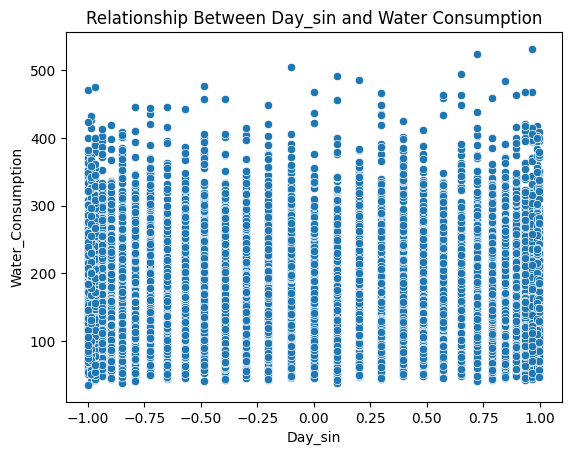

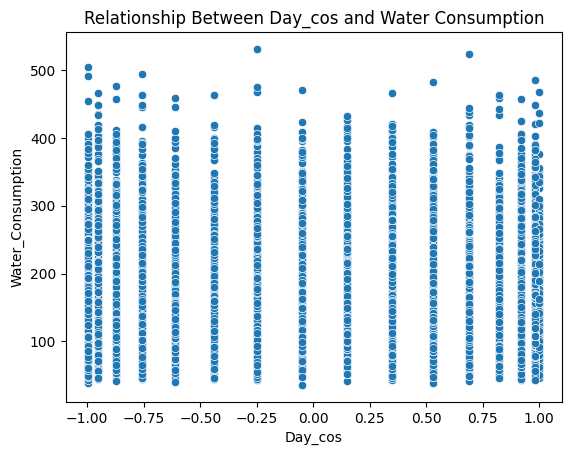

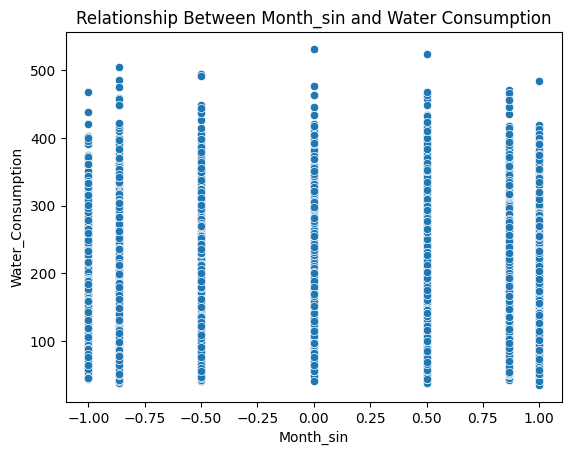

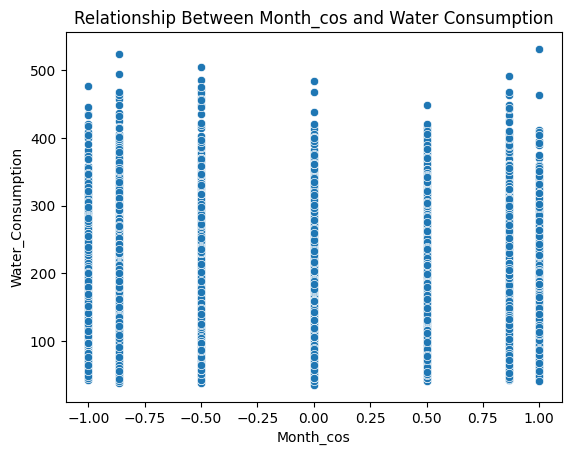

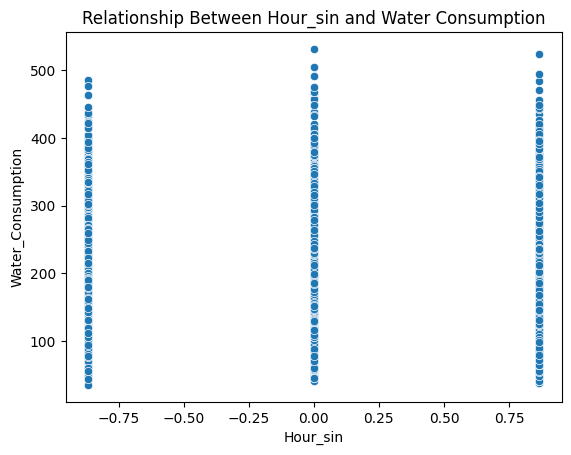

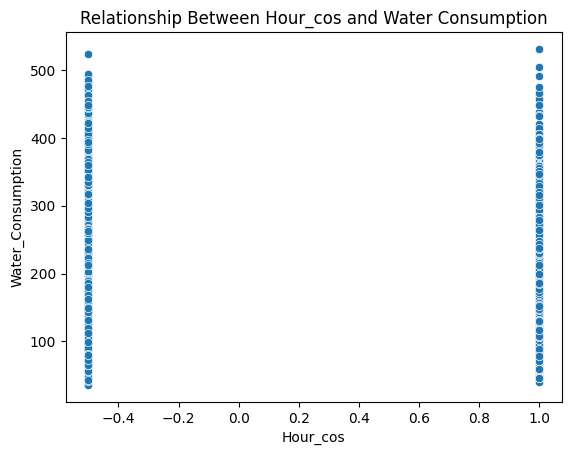

In [144]:
cyclical_features = ['Day_sin', 'Day_cos', 'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos']
for col in cyclical_features:
    sns.scatterplot(data=df_encoded, x = col, y='Water_Consumption')
    plt.title(f"Relationship Between {col} and Water Consumption")
    plt.show()

There seems to be little to very less relationship between cyclical features and predictor variable, there for they can be dropped. also based on all the importances by VIF and feature importances there sre few features that further needs to be dropped

In [146]:
features_to_remove = [
    "High_Humidity_Flag",
    "Apartment_Type_Unknown",
    "Weekend_Flag",
    "High_Temp_Flag",
    "Amenities_Jacuzzi",
    "Winter_Flag",
    "Summer_Flag",
    "Hour_cos",
    "Apartment_Type_Bungalow",
    "Hour_sin",
    "Amenities_Swimming Pool",
    "Apartment_Type_Detached",
    "Many_Residents_Flag",
    "Day_cos",
    "Month_cos"
]

In [147]:
df_encoded = df_encoded.drop(columns=features_to_remove)
df_encoded

,Residents,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Appliance_Usage,Water_Consumption,Week,is_null_amenities,Apartment_Type_2BHK,Apartment_Type_3BHK,Apartment_Type_Studio,Amenities_Garden,Temp_WaterPrice_Interaction,Guests_ApplianceUsage_Interaction,ApplianceUsage_Squared,Month_sin,Day_sin
0,1,15.310000,46.61,1.06,0.97,2,0,0.0,64.85,1,0,0,0,1,0,16.228600,0.0,0.0,0.500000,0.201299
1,4,21.010000,66.11,2.98,0.91,4,1,1.0,192.50,1,0,0,0,0,0,62.609800,1.0,1.0,0.500000,0.201299
2,2,12.860000,60.86,1.44,1.43,3,0,1.0,116.62,1,1,0,0,0,1,18.518400,0.0,1.0,0.500000,0.201299
3,2,20.160000,50.58,1.48,0.91,3,-1,0.0,76.96,2,0,0,0,0,1,29.836800,-0.0,0.0,0.500000,0.394356
4,2,16.230000,52.25,1.14,1.11,3,0,0.0,104.70,2,0,0,0,0,0,18.502200,0.0,0.0,0.500000,0.394356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2,25.610000,61.50,1.70,0.94,2,0,0.0,78.59,4,1,0,0,0,1,43.537000,0.0,0.0,-0.866025,0.897805
13996,5,13.270000,52.58,1.88,1.03,4,0,1.0,185.50,4,0,1,0,0,1,24.947600,0.0,1.0,-0.866025,0.897805
13997,4,22.566559,46.93,1.22,1.10,3,0,1.0,180.28,4,1,1,0,0,1,27.531203,0.0,1.0,-0.866025,0.897805
13998,4,11.620000,64.48,2.86,1.12,4,1,0.0,212.19,5,0,0,1,0,0,33.233200,0.0,0.0,-0.866025,0.790776


In [155]:
df['Apartment_Type'].unique()

array(['Studio', 'Unknown', 'Cottage', '1BHK', '2BHK', 'Bungalow', '3BHK',
       'Detached'], dtype=object)

In [148]:
df_encoded.columns

Index(['Residents', 'Temperature', 'Humidity', 'Water_Price',
       'Period_Consumption_Index', 'Income_Level', 'Guests', 'Appliance_Usage',
       'Water_Consumption', 'Week', 'is_null_amenities', 'Apartment_Type_2BHK',
       'Apartment_Type_3BHK', 'Apartment_Type_Studio', 'Amenities_Garden',
       'Temp_WaterPrice_Interaction', 'Guests_ApplianceUsage_Interaction',
       'ApplianceUsage_Squared', 'Month_sin', 'Day_sin'],
      dtype='object')

## Model Training

In [149]:
## split the dataset df_encoded for evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(columns='Water_Consumption')
y = df_encoded['Water_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11200, 19), (2800, 19), (11200,), (2800,))

In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dictionary of Models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor(objective='reg:squarederror'),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

# Hyperparameter Grid (without MultiOutputRegressor)
params = {
    "Decision Tree": {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter': ['best', 'random'],
        'max_features': ['sqrt', 'log2']
    },
    "Random Forest": {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'max_features': ['sqrt', 'log2', None],
        'n_estimators': [32, 64, 128, 256]
    },
    "Gradient Boosting": {
        'loss': ['squared_error', 'huber', 'absolute_error', 'quantile'],
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'subsample': [0.7, 0.75, 0.8, 0.85, 0.9],
        'criterion': ['squared_error', 'friedman_mse'],
        'max_features': [1.0, 'sqrt', 'log2'],
        'n_estimators': [32, 64, 128, 256]
    },
    "Linear Regression": {},
    "SVR": {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    },
    "XGBRegressor": {
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'n_estimators': [32, 64, 128, 256]
    }
    ,
    "AdaBoost Regressor": {
        'learning_rate': [0.1, 0.01, 0.5, 0.001],
        'loss': ['linear', 'square', 'exponential'],
        'n_estimators': [32, 64, 128, 256]
    }
}


In [152]:
## model training

def evaluate_model(X_train, X_test, y_train, y_test, models, params):
    train_report = dict()
    test_report = dict()
    for i in range(len(models)):
        model = list(models.values())[i]
        param = params[list(models.keys())[i]]

        gs = GridSearchCV(model, param, cv=3, n_jobs=-1)
        gs.fit(X_train, y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_model_score = []
        test_model_score = []

        #train model scores
        rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        mae = mean_absolute_error(y_train, y_train_pred)
        r2 = r2_score(y_train, y_train_pred)

        train_model_score.extend([rmse, mae, r2])
        train_report[list(models.keys())[i]] = train_model_score

        #test model scores
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        mae_test = mean_absolute_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)
            
        test_model_score.extend([rmse_test, mae_test, r2_test])

        test_report[list(models.keys())[i]] = test_model_score
        
        train_report_df = pd.DataFrame.from_dict(train_report, orient = 'index', columns = ["RMSE", "MAE", "R²"])
        test_report_df = pd.DataFrame.from_dict(test_report, orient = 'index', columns = ["RMSE", "MAE", "R²"])

    return train_report_df, test_report_df
    


In [153]:
train_report, test_report = evaluate_model(X_train, X_test, y_train, y_test, models, params)

In [154]:
print(train_report)
print("-----------------------")
print(test_report)

                         RMSE        MAE        R²
Decision Tree        0.000000   0.000000  1.000000
Random Forest        6.913238   4.455989  0.990877
Gradient Boosting   11.937546   7.063069  0.972799
Linear Regression   30.672031  20.888146  0.820425
SVR                 12.273477   4.776794  0.971246
XGBRegressor         6.059775   4.042613  0.992991
AdaBoost Regressor  33.963921  28.298261  0.779811
-----------------------
                         RMSE        MAE        R²
Decision Tree       35.686990  24.106475  0.772335
Random Forest       18.273984  11.944336  0.940304
Gradient Boosting   12.762185   7.820804  0.970884
Linear Regression   32.489362  21.780099  0.811306
SVR                 15.034036   7.635268  0.959596
XGBRegressor        12.882924   7.853673  0.970331
AdaBoost Regressor  34.706966  28.684581  0.784668


DecisionTreeRegressor()